In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import os
import re 
import bz2
import gc
import chardet
import nltk 
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data=pd.read_csv("../input/flipkarttask/flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv")
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [4]:
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [5]:
def preprocess_string(str_arg):
    '''
    input: str_arg --> Takes string to clean
    output: cleaned_str --> Gives back cleaned string
    This fuction cleans the text in the mentioned ways as comments after the line.This has been copied from some other kernel.

    '''
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
    
    return cleaned_str # Returning the preprocessed string in tokenized form

In [6]:
# Reading relevant data
data['product_category_tree'] = data['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

In [7]:
d=data["product_category_tree"].value_counts().to_dict()
lists = (d.items()) # sorted by key, return a list of tuples

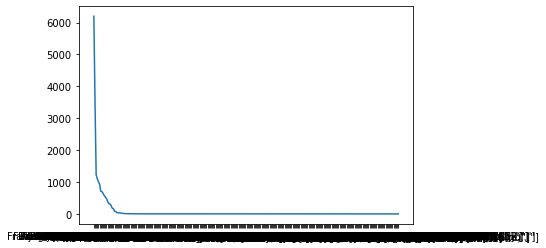

In [8]:
import matplotlib.pylab as plt
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [9]:
# Category processing. (Check data to understand)
# Taking most popular 20 items only
top_15_gen = list(data.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(15).index)
# Taking only top 5 categories for example sake
processed_df = data[data['product_category_tree'].isin(top_15_gen)][['product_category_tree','description']]
# Selecting only relevant columns
processed_df['description'] = data['description'].astype('str').apply(preprocess_string)
# Cleaning strings
cat_list = list(processed_df['product_category_tree'].unique())
# Creating a list of categories for later use
print(cat_list)
# Printing the list of top 5 categories
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded
# Encoding the product category

['Clothing', 'Footwear', 'Pens & Stationery', 'Beauty and Personal Care', 'Home Decor & Festive Needs', 'Automotive', 'Tools & Hardware', 'Home Furnishing', 'Baby Care', 'Mobiles & Accessories', 'Watches', 'Toys & School Supplies', 'Jewellery', 'Kitchen & Dining', 'Computers']


In [10]:
processed_df["product_category_tree"].unique().shape

(15,)

In [11]:
processed_df.isnull().sum()

product_category_tree    0
description              0
dtype: int64

In [12]:
train=processed_df.copy()

In [13]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
symbols = r'@[A-Za-z0-9]+'
url = r'https?://[A-Za-z0-9./]+'
remove = r'|'.join((symbols, url))
def cleaning_data(text):
#     soup = BeautifulSoup(text, 'lxml')
#     souped = soup.get_text()
    clean = re.sub(remove, '', text)
   
    letters = re.sub("[^a-zA-Z]", ' ', clean)
    lower = letters.lower()

    words = tok.tokenize(lower)
    return " ".join(words).strip()
    #return lower

In [14]:
train["description"]=train["description"].apply(cleaning_data)

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

In [16]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py
import tokenization

In [17]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(15, activation='softmax')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=5e-6), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [18]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 23.5 s, sys: 5.86 s, total: 29.3 s
Wall time: 33.5 s


In [19]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [20]:
train

,product_category_tree,description
0,3,key features of alisha solid women s cycling s...
2,5,key features of aw bellies sandals wedges heel...
3,3,key features of alisha solid women s cycling s...
6,3,key features of alisha solid women s cycling s...
8,5,key features of dilli bazaaar bellies corporat...
...,...,...
19995,1,buy walldesign small vinyl sticker for rs onli...
19996,1,buy wallmantra large vinyl stickers sticker fo...
19997,1,buy elite collection medium acrylic sticker fo...
19998,1,buy elite collection medium acrylic sticker fo...


In [21]:
train_input = bert_encode(train.description.values, tokenizer, max_len=160)
train_labels = train.product_category_tree.values

In [22]:
model = build_model(bert_layer, max_len=160)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [23]:
# convert integers to dummy variables (i.e. one hot encoded)
from keras.utils import np_utils
dummy_y = np_utils.to_categorical(train_labels)
dummy_y.shape

(18678, 15)

In [24]:
train_history = model.fit(
    train_input, dummy_y,
    epochs=10,
    batch_size=16
)

model.save('model.h5')

Epoch 1/10
1168/1168 [==============================] - 1085s 902ms/step - loss: 0.0952 - accuracy: 0.7758
Epoch 2/10
1168/1168 [==============================] - 1052s 901ms/step - loss: 0.0080 - accuracy: 0.9868
Epoch 3/10
1168/1168 [==============================] - 1053s 902ms/step - loss: 0.0040 - accuracy: 0.9933
Epoch 4/10
1168/1168 [==============================] - 1054s 903ms/step - loss: 0.0026 - accuracy: 0.9956
Epoch 5/10
1168/1168 [==============================] - 1053s 902ms/step - loss: 0.0016 - accuracy: 0.9972
Epoch 6/10
1168/1168 [==============================] - 1053s 901ms/step - loss: 0.0017 - accuracy: 0.9968
Epoch 7/10
1168/1168 [==============================] - 1052s 901ms/step - loss: 0.0017 - accuracy: 0.9968
Epoch 8/10
1168/1168 [==============================] - 1052s 901ms/step - loss: 7.6456e-04 - accuracy: 0.9986
Epoch 9/10
1168/1168 [==============================] - 1053s 902ms/step - loss: 8.7780e-04 - accuracy: 0.9980
Epoch 10/10
1168/1168 [======

In [25]:
#We could train it for more epochs so as to get good accuracy